# White Wine Quality

The three largest indicators for white wine quality are
- alcohol (pos, high)
  - density (neg, high)
  - total sulfur dioxide (neg, high)
  - chlorides (neg, med)
  - residual sugar (neg, med)
- density (neg, med)
  - residual sugar (pos, high)
  - total sulfur dioxide (pos, high)
  - alcohol (neg, med)
  - fixed acidity (pos, med)
  - chlorides (pos, med)
- chlorides (neg, med)
  - alcohol (neg, med)
  - density (pos, med)
  - total sulfur dioxide (pos, med)
  - citric acid (pos, med)

In this notebook these quantities are examined to determine if they are good indicators of white wine quality. 

The quantities are quite strongly dependent on each other.

Is there a good balance? How to find the balance?

# Configuration

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from scipy import stats 
import pingouin as pg


In [59]:
# config packages
pd.options.mode.copy_on_write = "warn"

In [60]:
# load project config
with open("../config/config.yaml", "r") as file:
    config = yaml.safe_load(file)
config

{'data_path_wine_red': 'data/wine+quality/winequality-red.csv',
 'data_path_wine_white': 'data/wine+quality/winequality-white.csv'}

# Import

In [61]:
# NOTE - Keep two data frames if data is actually separate
# TODO - how to build paths in python
# TODO - work with config

# wine data
# wine_r = pd.read_parquet('../' + config['data_path_wine_red'], sep=';')
# wine_w = pd.read_parquet('../' + config['data_path_wine_white'], sep=';')
wine_w = pd.read_parquet('../data/processed/wine_w.parquet')
wine_r = pd.read_parquet('../data/processed/wine_r.parquet')
wine   = pd.read_parquet('../data/processed/wine.parquet')

# normalized wine data
wine_w_norm = pd.read_parquet('../data/processed/wine_w_norm.parquet')
wine_r_norm = pd.read_parquet('../data/processed/wine_r_norm.parquet')
wine_norm = pd.read_parquet('../data/processed/wine_norm.parquet')

# outlier
wine_w_is_outlier_any = pd.read_parquet('../data/processed/wine_w_is_outlier_any.parquet')
wine_r_is_outlier_any = pd.read_parquet('../data/processed/wine_r_is_outlier_any.parquet')

In [62]:
remove_outliers = True

if remove_outliers:
    wine_w = wine_w[~wine_w_is_outlier_any.loc[:,0]]
    wine_r = wine_r[~wine_r_is_outlier_any.loc[:,0]]
    wine_w_norm = wine_w_norm[~wine_w_is_outlier_any.loc[:,0]]
    wine_r_norm = wine_r_norm[~wine_r_is_outlier_any.loc[:,0]]

C:\Users\olive\AppData\Local\Temp\ipykernel_42056\1607089427.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wine_w = wine_w[~wine_w_is_outlier_any.loc[:,0]]
C:\Users\olive\AppData\Local\Temp\ipykernel_42056\1607089427.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wine_r = wine_r[~wine_r_is_outlier_any.loc[:,0]]
C:\Users\olive\AppData\Local\Temp\ipykernel_42056\1607089427.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wine_w_norm = wine_w_norm[~wine_w_is_outlier_any.loc[:,0]]
C:\Users\olive\AppData\Local\Temp\ipykernel_42056\1607089427.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wine_r_norm = wine_r_norm[~wine_r_is_outlier_any.loc[:,0]]


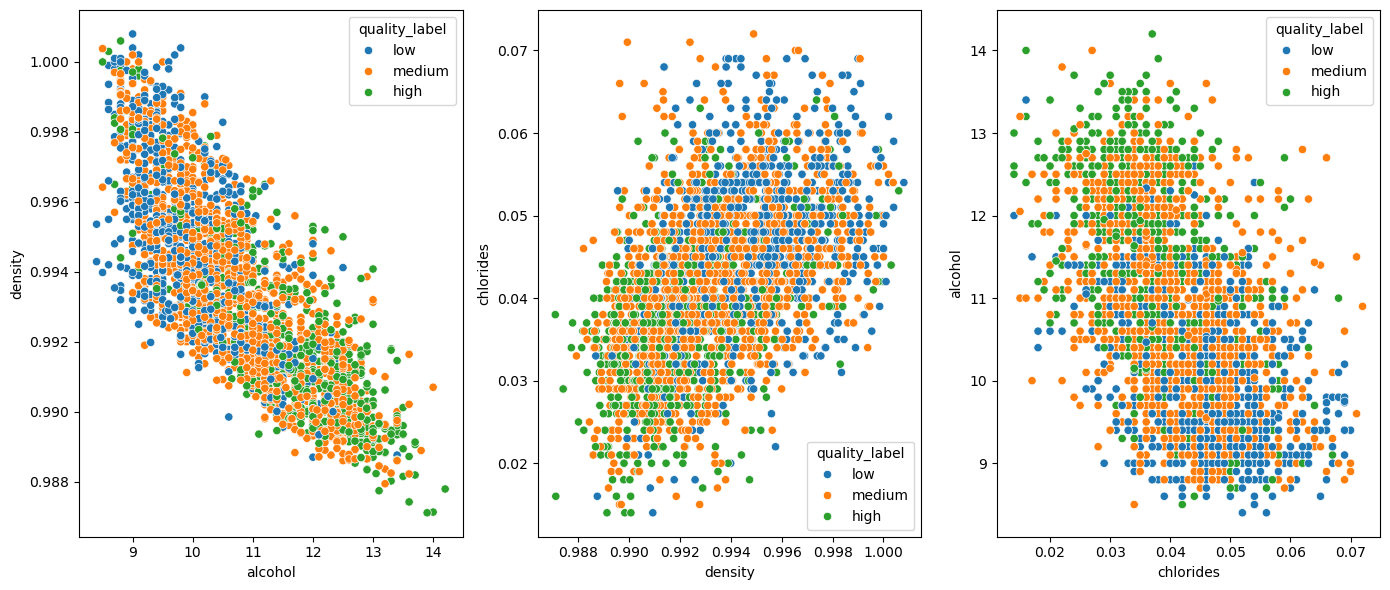

In [63]:
fig,ax = plt.subplots(1, 3, figsize=(14,6))

sns.scatterplot(wine_w, x='alcohol', y='density', hue='quality_label', ax=ax[0])
sns.scatterplot(wine_w, x='density', y='chlorides', hue='quality_label', ax=ax[1])
sns.scatterplot(wine_w, x='chlorides', y='alcohol', hue='quality_label', ax=ax[2])

plt.tight_layout()

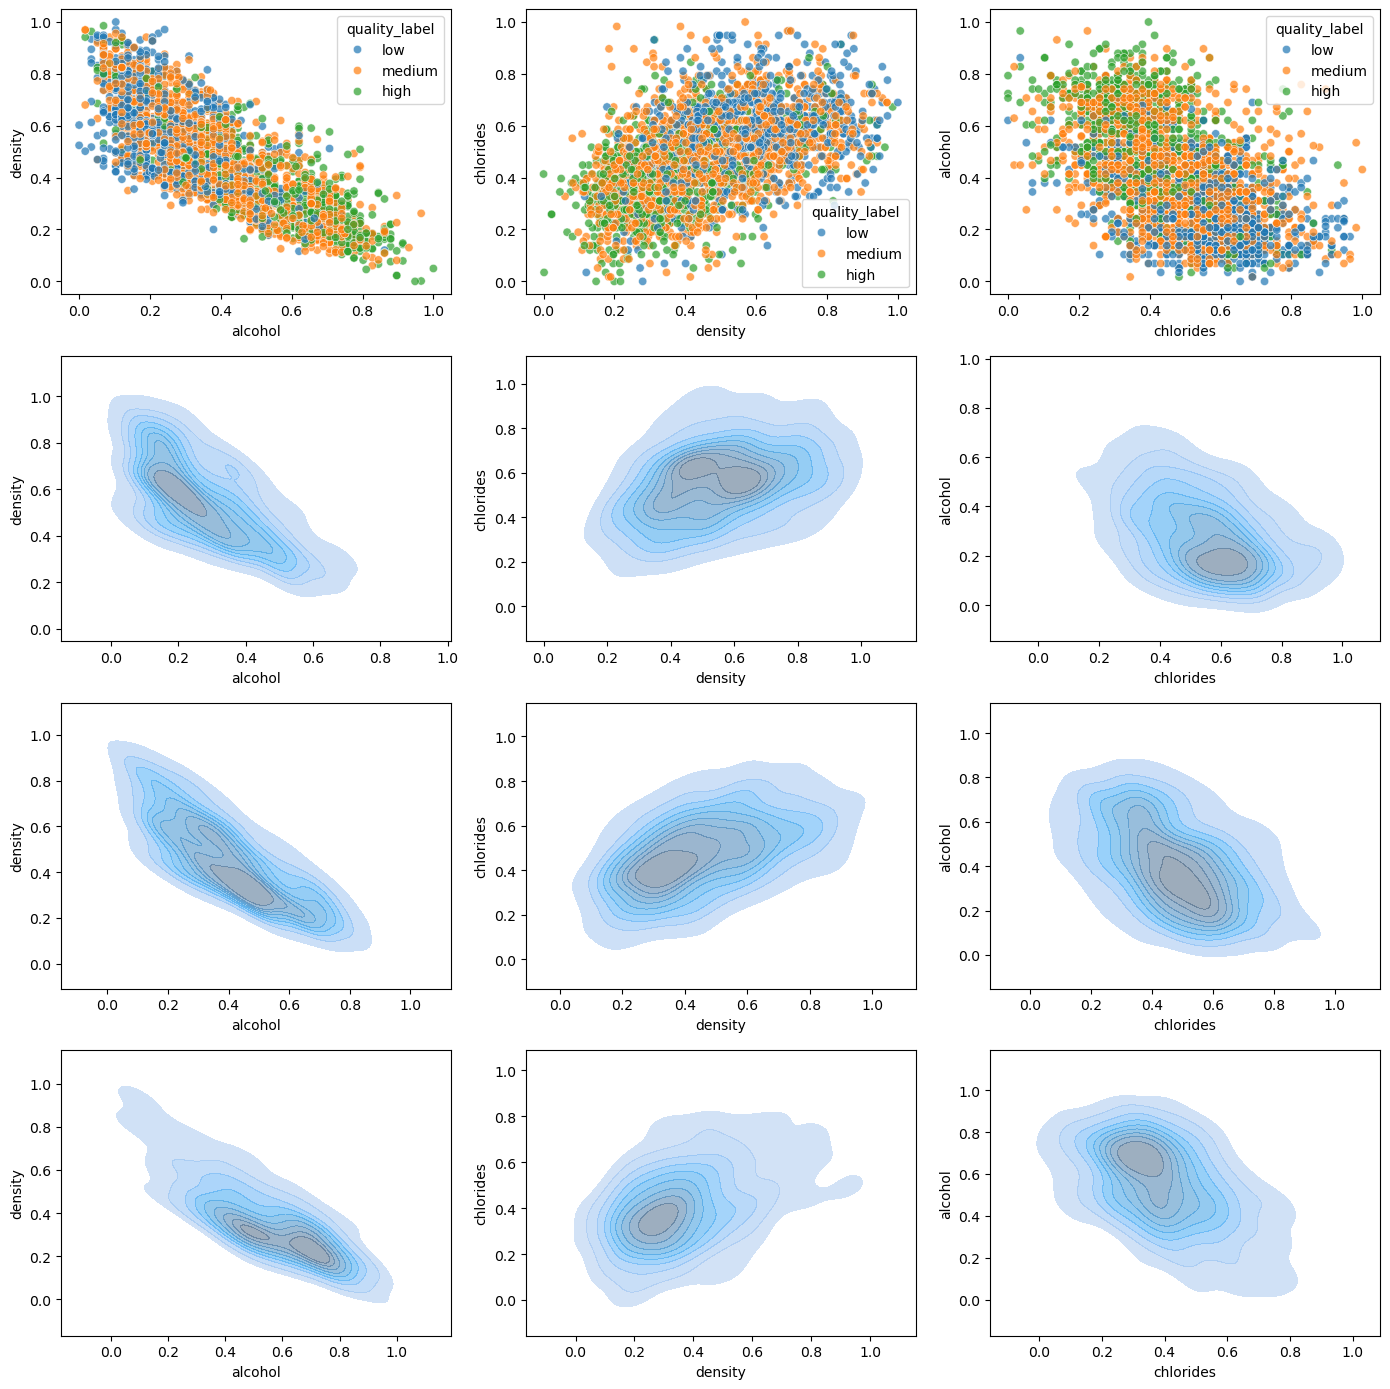

In [69]:
fig,ax = plt.subplots(4, 3, figsize=(14,14), sharex=False, sharey=False)

low = wine_w_norm.quality_label == 'low'
med = wine_w_norm.quality_label == 'medium'
hig = wine_w_norm.quality_label == 'high'

sns.scatterplot (wine_w_norm     , x='alcohol', y='density', hue='quality_label', alpha=0.7,  ax=ax[0,0])
sns.kdeplot     (wine_w_norm[low], x='alcohol', y='density', fill=True, alpha=0.5, ax=ax[1,0])
sns.kdeplot     (wine_w_norm[med], x='alcohol', y='density', fill=True, alpha=0.5, ax=ax[2,0])
sns.kdeplot     (wine_w_norm[hig], x='alcohol', y='density', fill=True, alpha=0.5, ax=ax[3,0])

sns.scatterplot (wine_w_norm     , x='density', y='chlorides', hue='quality_label', alpha=0.7, ax=ax[0,1])
sns.kdeplot     (wine_w_norm[low], x='density', y='chlorides', fill=True, alpha=0.5, ax=ax[1,1])
sns.kdeplot     (wine_w_norm[med], x='density', y='chlorides', fill=True, alpha=0.5, ax=ax[2,1])
sns.kdeplot     (wine_w_norm[hig], x='density', y='chlorides', fill=True, alpha=0.5, ax=ax[3,1])

sns.scatterplot (wine_w_norm     , x='chlorides', y='alcohol', hue='quality_label', alpha=0.7, ax=ax[0,2])
sns.kdeplot     (wine_w_norm[low], x='chlorides', y='alcohol', fill=True, alpha=0.5, ax=ax[1,2])
sns.kdeplot     (wine_w_norm[med], x='chlorides', y='alcohol', fill=True, alpha=0.5, ax=ax[2,2])
sns.kdeplot     (wine_w_norm[hig], x='chlorides', y='alcohol', fill=True, alpha=0.5, ax=ax[3,2])

plt.tight_layout()

<Axes: xlabel='alcohol', ylabel='density'>

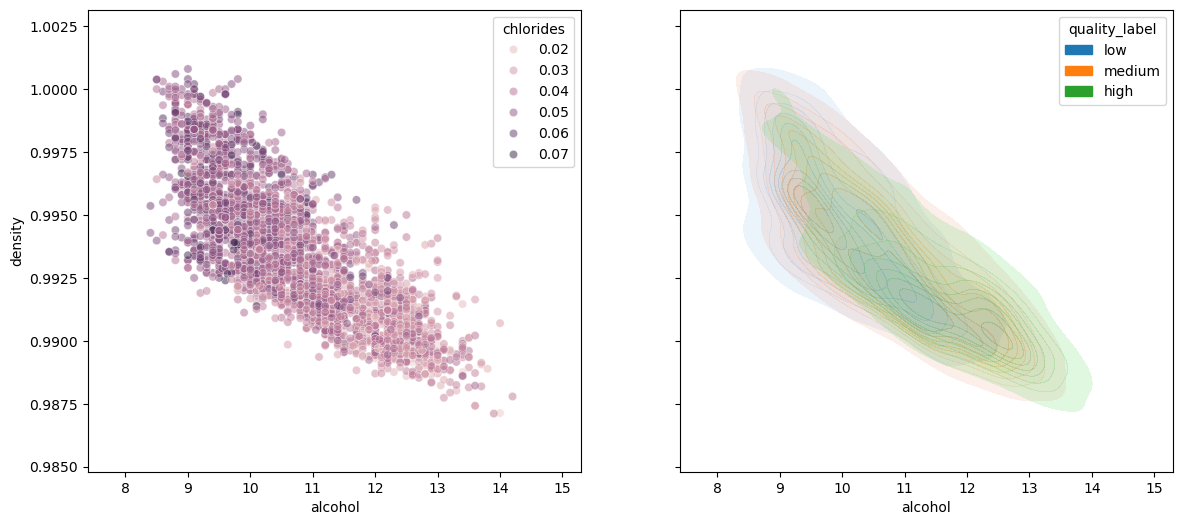

In [70]:
fig,ax = plt.subplots(1, 2, figsize=(14,6), sharex=True, sharey=True)

sns.scatterplot(wine_w, x='alcohol', y='density', hue='chlorides', alpha=0.5,  ax=ax[0])
sns.kdeplot(wine_w, x='alcohol', y='density', hue='quality_label', fill=True, alpha=0.2, ax=ax[1])

<Axes: xlabel='quality', ylabel='alcohol'>

c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


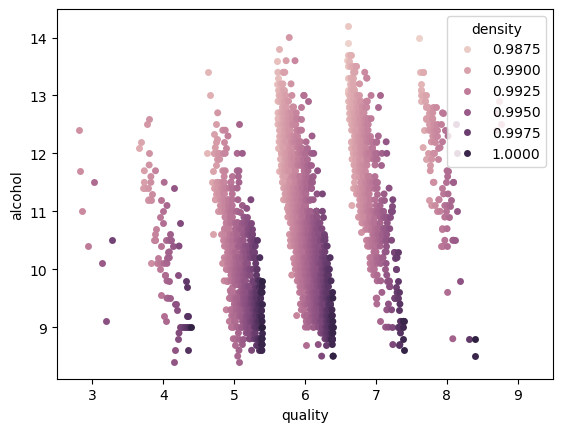

In [66]:
sns.stripplot(wine_w, x= 'quality', y= 'alcohol', hue= 'density', dodge=True)

What's going on with 

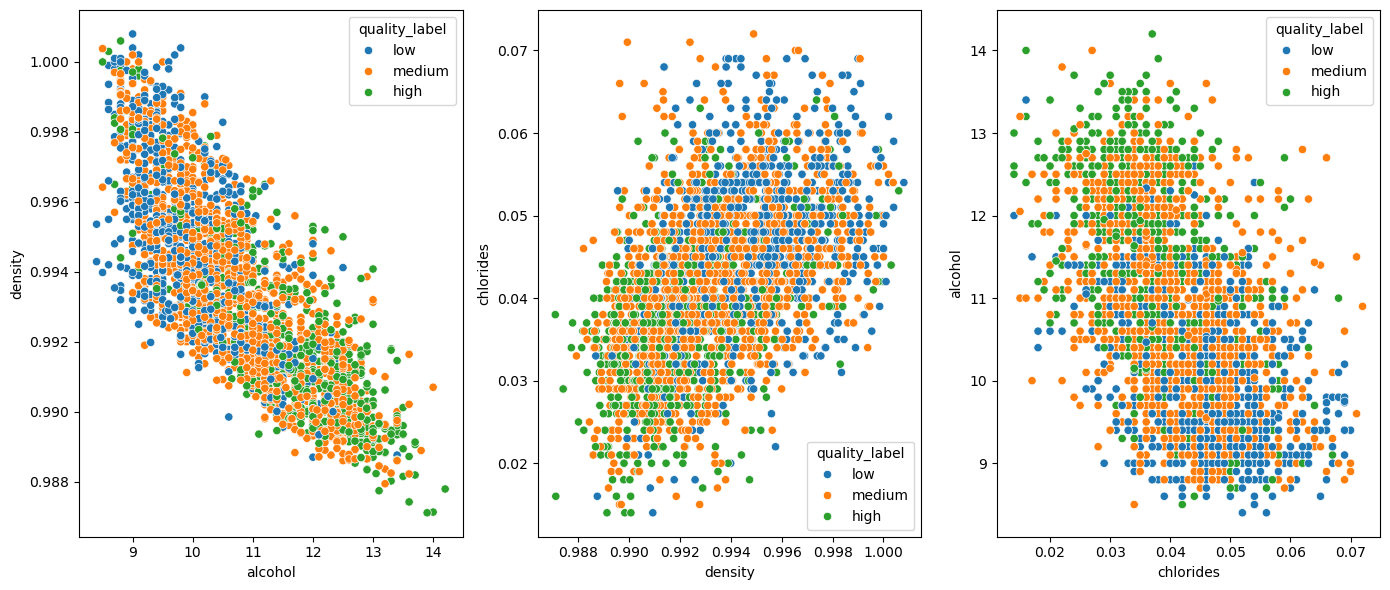

In [67]:
fig,ax = plt.subplots(1, 3, figsize=(14,6))

sns.scatterplot(wine_w, x='alcohol', y='density', hue='quality_label', ax=ax[0])
sns.scatterplot(wine_w, x='density', y='chlorides', hue='quality_label', ax=ax[1])
sns.scatterplot(wine_w, x='chlorides', y='alcohol', hue='quality_label', ax=ax[2])

plt.tight_layout()